# Data sets

There is a lot of Documentation on this subject. Here we will breifly introduce Series and Dataframes to help research with DataBases

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

# Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print s

a    0.211962
b    0.721872
c   -0.917796
d    0.953977
e   -0.372070
dtype: float64


In [3]:
s['a']

0.21196175211658444

In [4]:
s[0]

0.21196175211658444

In [5]:
s['c']*3.0

-2.7533876428750537

In [6]:
np.exp(s)

a    1.236101
b    2.058283
c    0.399398
d    2.596013
e    0.689306
dtype: float64

In [11]:
s.plot()

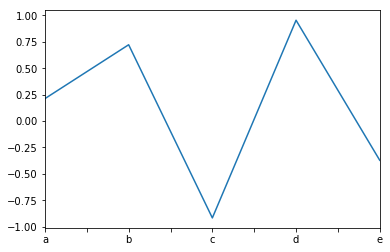

In [12]:
import matplotlib.pyplot as plt
plt.show()

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.ipp.mpg.de/36468/zoom-1369313316.jpg")

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("QCK51vqWunU")

In [13]:
shot = pd.Series(np.array([1e6, 12e6, 0.0, 1.2e6]), index=['PECRH', 'PNBI', 'PICRH', 'POHM'], name='#30554')
print shot

PECRH     1000000.0
PNBI     12000000.0
PICRH           0.0
POHM      1200000.0
Name: #30554, dtype: float64


In [ ]:
np.sum(shot)

In [14]:
shot2 = pd.Series(np.array([2.5e6, 6e6, 3e6, 1.0e6]), index=['PECRH', 'PNBI', 'PICRH', 'POHM'], name="#30733")
print shot2

PECRH    2500000.0
PNBI     6000000.0
PICRH    3000000.0
POHM     1000000.0
Name: #30733, dtype: float64


In [ ]:
np.sum(shot2)

In [ ]:
shot + shot2

In [ ]:
shot['PECRH'] + shot2['PECRH']

In [ ]:
print "Total heating power:", np.sum(shot + shot2)
print "Total heating power:", np.sum(shot) + np.sum(shot2)

In [ ]:
shot.mean()

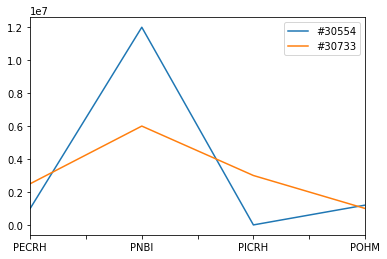

In [20]:
shot.plot()
shot2.plot()
plt.legend()
plt.show()

# Dataframes

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

In [21]:
import webbrowser
url = 'https://en.wikipedia.org/wiki/2016%E2%80%9317_Primeira_Liga#Attendances'
webbrowser.open(url)

True

In [25]:
df = pd.read_csv('Attendances.csv')
##Get a single sheet
#df = pd.ExcelFile('Attendances.xlsx').parse('Attendances')
#Or read_json
#df = pd.read_clipboard()

In [23]:
df.head(3)

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,390748,63312,51566,55821,+10.9%
1,2,Sporting CP,388328,49399,40027,43148,+7.9%
2,3,Porto,277491,50019,22208,34686,+7.3%


In [ ]:
df.tail(2)

In [ ]:
df

In [ ]:
df.loc[4]

In [ ]:
df[['Team','Average']]

In [ ]:
#How many people during a Match Day went to a game
df['Average'].sum()

You need to be careful and make sure your database is conviniently formatted. Here, the Portuguese convention for the thousands separator, a comma, ruined our chances of having floats or ints. No math is possible, so we must replace it in the database.

In [9]:
#Fields we want to change
df2 = df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [ ]:
df2

In [ ]:
df2.mean()

In [10]:
#To replace with a similar dataframe as the original
ndf = df.copy(deep=True)
ndf[['Total','High','Low','Average']] = df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [13]:
ndf.head()

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,390748,63312,51566,55821,+10.9%
1,2,Sporting CP,388328,49399,40027,43148,+7.9%
2,3,Porto,277491,50019,22208,34686,+7.3%
3,4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%
4,5,Braga,73298,11328,7543,9162,−17.9%


In [12]:
df.head()

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,390748,63312,51566,55821,+10.9%
1,2,Sporting CP,388328,49399,40027,43148,+7.9%
2,3,Porto,277491,50019,22208,34686,+7.3%
3,4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%
4,5,Braga,73298,11328,7543,9162,−17.9%


In [14]:
ndf[ndf['Total']>100000]

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,390748,63312,51566,55821,+10.9%
1,2,Sporting CP,388328,49399,40027,43148,+7.9%
2,3,Porto,277491,50019,22208,34686,+7.3%
3,4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%


In [15]:
ndf.sort_values('High', ascending=False)

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,390748,63312,51566,55821,+10.9%
2,3,Porto,277491,50019,22208,34686,+7.3%
1,2,Sporting CP,388328,49399,40027,43148,+7.9%
3,4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%
7,8,Belenenses,34982,12236,1309,4997,+12.0%
4,5,Braga,73298,11328,7543,9162,−17.9%
5,6,Marítimo,45746,10320,4150,6535,+6.3%
6,7,Boavista,42070,9958,4182,5259,−13.4%
8,9,Rio Ave,38945,8357,2116,4327,+31.0%
9,10,Chaves,26852,8000,1885,3357,+22.6%1


print the line where condition is met

In [16]:
ndf.loc[ndf['Low'].idxmin()]

Pos                18
Team       Moreirense
Total           11394
High             3810
Low               640
Average          1424
Change         −36.5%
Name: 17, dtype: object

In [ ]:
ndf.loc[ndf['Low'].idxmax()]

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#Make it nicer
matplotlib.style.use('ggplot')

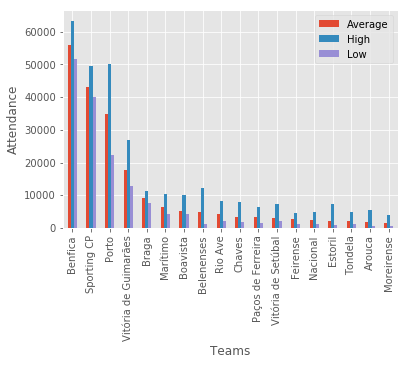

In [32]:
#ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar')
ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar')
ax.set_xlabel('Teams')
ax.set_ylabel('Attendance')
plt.show()